<a href="https://colab.research.google.com/github/madhurjagdale/EDA-Capstone-MJ/blob/main/MJ_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# Explore : travel through (an unfamiliar area) in order to learn about it. 
## What is a single most important task for an explorer ? " When you travel into unknown lands to discover new part of the world, it is to ensure records of your discoveries are delivered back safe and sound, with or without you. Otherwise, it is all vein" An intruging line from a netflix movie 'Against the ice'

Exploration of data in data science is as important as the age of exploration (discovery) was for geography, history, science and  humanity. Age of exploration seeded the idea of globalization in true sense. Today one of the major challenges faced by the global world is terrorism. 

With access to The Global Terrorism Database our first task is to really explore the data to really understand it and try to learn from it. 
We really dont know what we gonna find out but, very excited!


So here go !

# Lets begin with rituals !

In [1]:
# Though it's not mandetory still, it always has to be np and pd.!

import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/EDA Capstone MJ/Global Terrorism Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# As we have the data now, lets see what's in it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


## This .info() didn't really show the basic information about our dataframe as expected. So we had to do some exploration on google to be able to view elaborate basic information.

In [5]:
# Below code gave us the info of all colums, their data types and null values. 
# Only df.info(verbose = True) gives all columns but doesn't show count of null values
df.info(verbose = True,null_counts = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

# 135 columns of data with with acronymed headers. 
## Looks like we need to read all 135 column names try to figure out what data they are really storing.

In [6]:
# This was supposed to show us name of all columns but, looks like we need to again take help from google.
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# Basic
df.shape

(181691, 135)

In [8]:
# Thats a lot of data
df.size

24528285

In [9]:
# This is supposed to show first 5 rows of dataframe which it did but while hiding many many columns in middle.
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
# So this is what we had to do to get all the columns, just say 'display.max_columns'
pd.set_option('display.max_columns', None)

In [11]:
# And yes we are able to see all columns. Feels quite like an explorer !
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [12]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

# I think we can call this Data Cleaning!
## After a tedious task of veiwing content of each of 135x column just through head and tail and correlating with basic information about type of data and null values. We had to pick the columns which seemed to have more relevent and readable information.
## So in below code we picked the column names for use in our further exploration and analys.

In [13]:
# Just lis of column names handpicked from complete df
columns_to_use = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'success' , 'suicide' , 'attacktype1_txt' , 'targtype1_txt', 'gname' , 'weaptype1_txt' , 'nkill', 'nwound', 'propextent_txt' , 'propvalue' , 'ransompaid'  ]

In [14]:
# So we are going ahead with total 17 columns
len(columns_to_use)

17

# Creating new data frame for further use with 'columns_to_use' 

In [15]:
# Passing a list of shortlisted columns names into new_df
new_df = df[columns_to_use]

In [16]:
# Just reading out the basic information of new df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   imonth           181691 non-null  int64  
 3   iday             181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   success          181691 non-null  int64  
 7   suicide          181691 non-null  int64  
 8   attacktype1_txt  181691 non-null  object 
 9   targtype1_txt    181691 non-null  object 
 10  gname            181691 non-null  object 
 11  weaptype1_txt    181691 non-null  object 
 12  nkill            171378 non-null  float64
 13  nwound           165380 non-null  float64
 14  propextent_txt   64065 non-null   object 
 15  propvalue        38989 non-null   float64
 16  ransompaid       774 non-null     floa

In [17]:
# Count of reported terrorist events.
new_df.eventid.nunique()

181691

In [18]:
# Count of successful events out of reported ones.
new_df.success.value_counts()

1    161632
0     20059
Name: success, dtype: int64

In [19]:
# Finding count of unique values in country column.
new_df.country_txt.nunique()

205

# There are 205 countries in data

In [20]:
# Reading unique values in country column.
new_df.country_txt.unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [21]:
# Lets the country wise number attacks.
new_df['country_txt'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

# The Country with highest number of terrorist attacks

In [22]:
# So below code gives coutry with highst number of terrorist events
print('Most affected country:', new_df['country_txt'].value_counts().idxmax())

Most affected country: Iraq


In [23]:
# Finding count of unique values in region_txt column.
new_df.region_txt.nunique()

12

# 12 Gergraphical regions. Considering large of count of countries, geographical region seems easier option to explore geaugraphy wise proporties of availble data

In [24]:
# Lets see what are 12 regions.
new_df.region_txt.unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [25]:
# And here we can see region wise number of reported events
new_df.region_txt.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

In [26]:
# Middle East & North Africa is region with maximum events, lets create a dataframe for same and see properties of this continent
df_middle_east_asia = new_df[new_df.region_txt == 'Middle East & North Africa']

In [27]:
df_middle_east_asia.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,success,suicide,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound,propextent_txt,propvalue,ransompaid
95,197002280001,1970,2,28,Jordan,Middle East & North Africa,1,0,Armed Assault,Tourists,Unknown,Firearms,NaN,NaN,Unknown,NaN,NaN
133,197003140002,1970,3,14,Egypt,Middle East & North Africa,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,0.0,2.0,Unknown,NaN,NaN
158,197003290002,1970,3,29,Lebanon,Middle East & North Africa,1,0,Bombing/Explosion,Government (Diplomatic),Popular Front for the Liberation of Palestine ...,Explosives,0.0,0.0,NaN,NaN,NaN
195,197004150001,1970,4,15,Jordan,Middle East & North Africa,1,0,Bombing/Explosion,Government (Diplomatic),Popular Front for the Liberation of Palestine ...,Explosives,0.0,0.0,Minor (likely < $1 million),100000.0,NaN
226,197004250001,1970,4,25,Turkey,Middle East & North Africa,1,0,Bombing/Explosion,Airports & Aircraft,Palestinians,Explosives,0.0,0.0,NaN,NaN,NaN


In [28]:
# Lets see country wise reported events in Middle East & North Africa
df_middle_east_asia.country_txt.value_counts()

Iraq                        24636
Turkey                       4292
Yemen                        3347
Algeria                      2743
Egypt                        2479
Lebanon                      2478
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Israel                       2183
Iran                          684
Saudi Arabia                  371
Bahrain                       207
Jordan                        113
Tunisia                       109
Kuwait                         76
Morocco                        36
United Arab Emirates           22
Qatar                           7
North Yemen                     6
Western Sahara                  5
South Yemen                     2
International                   1
Name: country_txt, dtype: int64

# If we look at the percentage of events in Iraq with resepect to world and the region, it is evident Iraq has been the most affected country

In [29]:
perc_of_attacks_on_Iraq = (new_df.country_txt[new_df.country_txt=='Iraq'].value_counts()) / new_df.eventid.nunique() *100
perc_of_attacks_on_Iraq

Iraq    13.559285
Name: country_txt, dtype: float64

In [30]:
perc_of_attacks_on_Iraq_wrt_region =(new_df.country_txt[new_df.country_txt=='Iraq'].value_counts()) / df_middle_east_asia.eventid.nunique() *100
perc_of_attacks_on_Iraq_wrt_region

Iraq    48.809288
Name: country_txt, dtype: float64

# If we look at the number of killings in Iraq and total number of reported killings, we find huge difference. Probably number of killings in Iraq were not reported only.

In [31]:
print(new_df.loc[new_df['nkill'].idxmax(),'country_txt'],'is the most affected country with number of people killed',new_df['nkill'].max())

Iraq is the most affected country with number of people killed 1570.0


In [32]:
new_df.nkill[new_df.country_txt=='Iraq'].sum()

78589.0

In [33]:
new_df.nkill.sum()

411868.0

# Type of Terrorist attacks

In [34]:
# Unique values in type of attack
new_df.attacktype1_txt.unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [35]:
# getting rid of all umknown values in complete dataframe
new_df = new_df.replace(['Unknown'],None)

In [36]:
# Combining 2x types of Hostage Taking into one for further analysis
new_df['attacktype1_txt'] = new_df['attacktype1_txt'].replace(['Hostage Taking (Kidnapping)','Hostage Taking (Barricade Incident)'],['Hostage Taking','Hostage Taking'])

In [37]:
# Just checking if previous code did the job
new_df.attacktype1_txt.unique()

array(['Assassination', 'Hostage Taking', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking',
       'Unarmed Assault'], dtype=object)

In [60]:
# Trial code which did not work
'''
def column_wise_total_value (data_frame,column_name,value_to_aggregate,column_attribute):
  return (data_frame[][data_frame.column_name=='column_attribute'].sum())
'''


In [113]:
# Trial code which did not work
'''def column_wise_sum_agg(column1,column2):
  temp_df=pd.DataFrame({'col1':column1,
                       'col2':column2},index=[0])
  return temp_df.groupby(['col1','col2'])['col2'].count().unstack()'''

In [114]:
'''temp_df=new_df.apply(lambda x: column_wise_sum_agg(x.country_txt, x.nkill), axis=1)'''

KeyboardInterrupt: ignored

In [59]:
new_df['nkill'][new_df.country_txt=='Iraq'].sum()

78589.0

In [115]:
new_df.targtype1_txt.unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Transportation', 'Tourists',
       'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [116]:
new_df.targtype1_txt.nunique()

21

##%matplotlib inline sets the backend of matplotlib to the 'inline' backend
With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [117]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

In [118]:
from datetime import datetime

# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
# importing seaborn for plotting
import seaborn as sns
import plotly.express as px

# Lets see year on year trend of attacks

In [120]:
new_df['iyear'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

In [121]:
year_wise = new_df['iyear'].value_counts()

In [122]:
year_wise.sort_index(inplace=True)

Text(0.5, 0, 'Year')

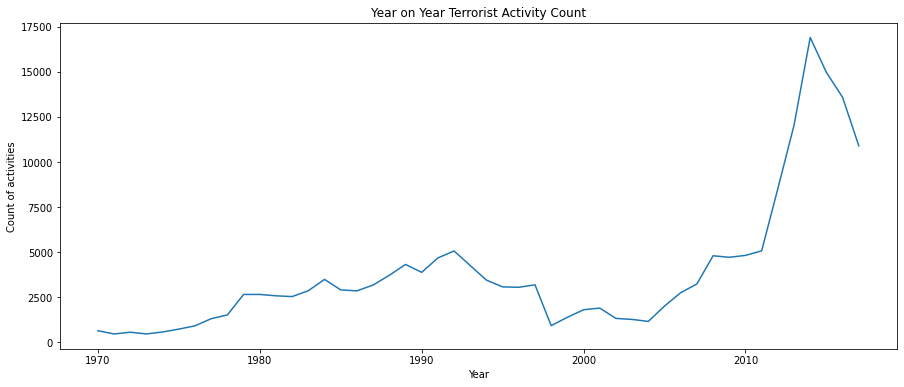

In [125]:
year_wise.plot(figsize=(15,6))

plt.title('Year on Year Terrorist Activity Count')
plt.ylabel('Count of activities')
plt.xlabel('Year')


In [126]:
year_wise_region_wise=new_df.groupby(['iyear','success'])['success'].count().unstack()

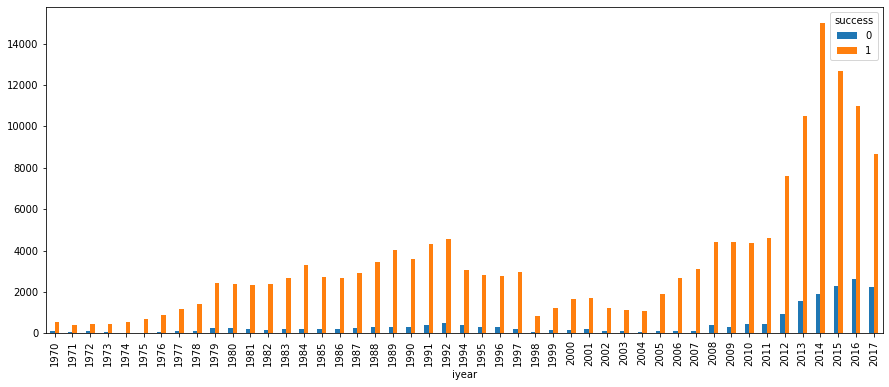

In [127]:
## Year wise success and unsuccessful

year_wise_region_wise.plot(kind='bar',figsize=(15,6))

In [135]:
region_wise_killing=new_df.groupby(['region_txt'])['nkill'].sum()

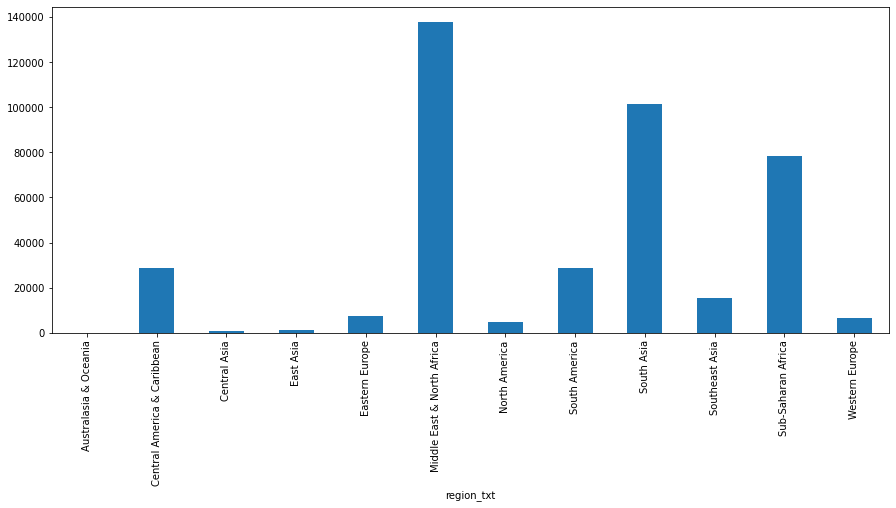

In [137]:
region_wise_killing.plot(kind='bar',figsize=(15,6))

In [160]:
distribution_attack_wise = new_df['attacktype1_txt'].value_counts()

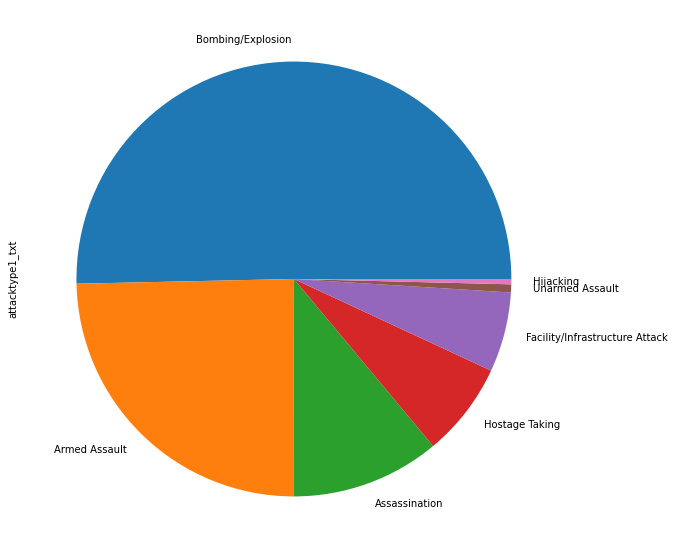

In [162]:
distribution_attack_wise.plot(kind='pie',figsize=(10,10))

In [152]:
year_attacktype_Wise_killings=new_df.groupby(['iyear','attacktype1_txt'])['nkill'].sum().unstack()

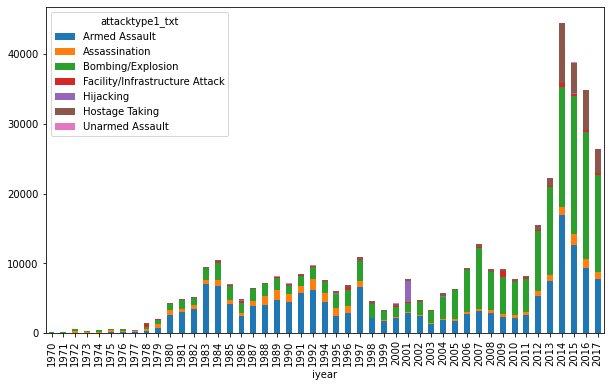

In [159]:
country_wise_prop_dam.plot(kind='bar',stacked=True,figsize=(10,6))

In [193]:
new_df.gname.describe()

count      181691
unique       3536
top       Taliban
freq        16211
Name: gname, dtype: object

In [187]:
gange_wise_attack_type_kill=new_df.groupby(['gname','attacktype1_txt'])['attacktype1_txt'].count().reset_index(name ='Total Amount')

In [190]:
gange_wise_attack_type_kill.sort_values('Total Amount', ascending=False)

,gname,attacktype1_txt,Total Amount
7718,Taliban,Bombing/Explosion,8722
3716,Islamic State of Iraq and the Levant (ISIL),Bombing/Explosion,7878
7716,Taliban,Armed Assault,4292
463,Al-Shabaab,Bombing/Explosion,3352
7269,Shining Path (SL),Bombing/Explosion,3163
...,...,...,...
3991,Jewish Defense Organization,Facility/Infrastructure Attack,1
3988,Jewish Defense Organization,Armed Assault,1
3985,Jewish Defense League (JDL),Hijacking,1
3980,Jewish Defenders,Facility/Infrastructure Attack,1
